<IPython.core.display.Javascript object>


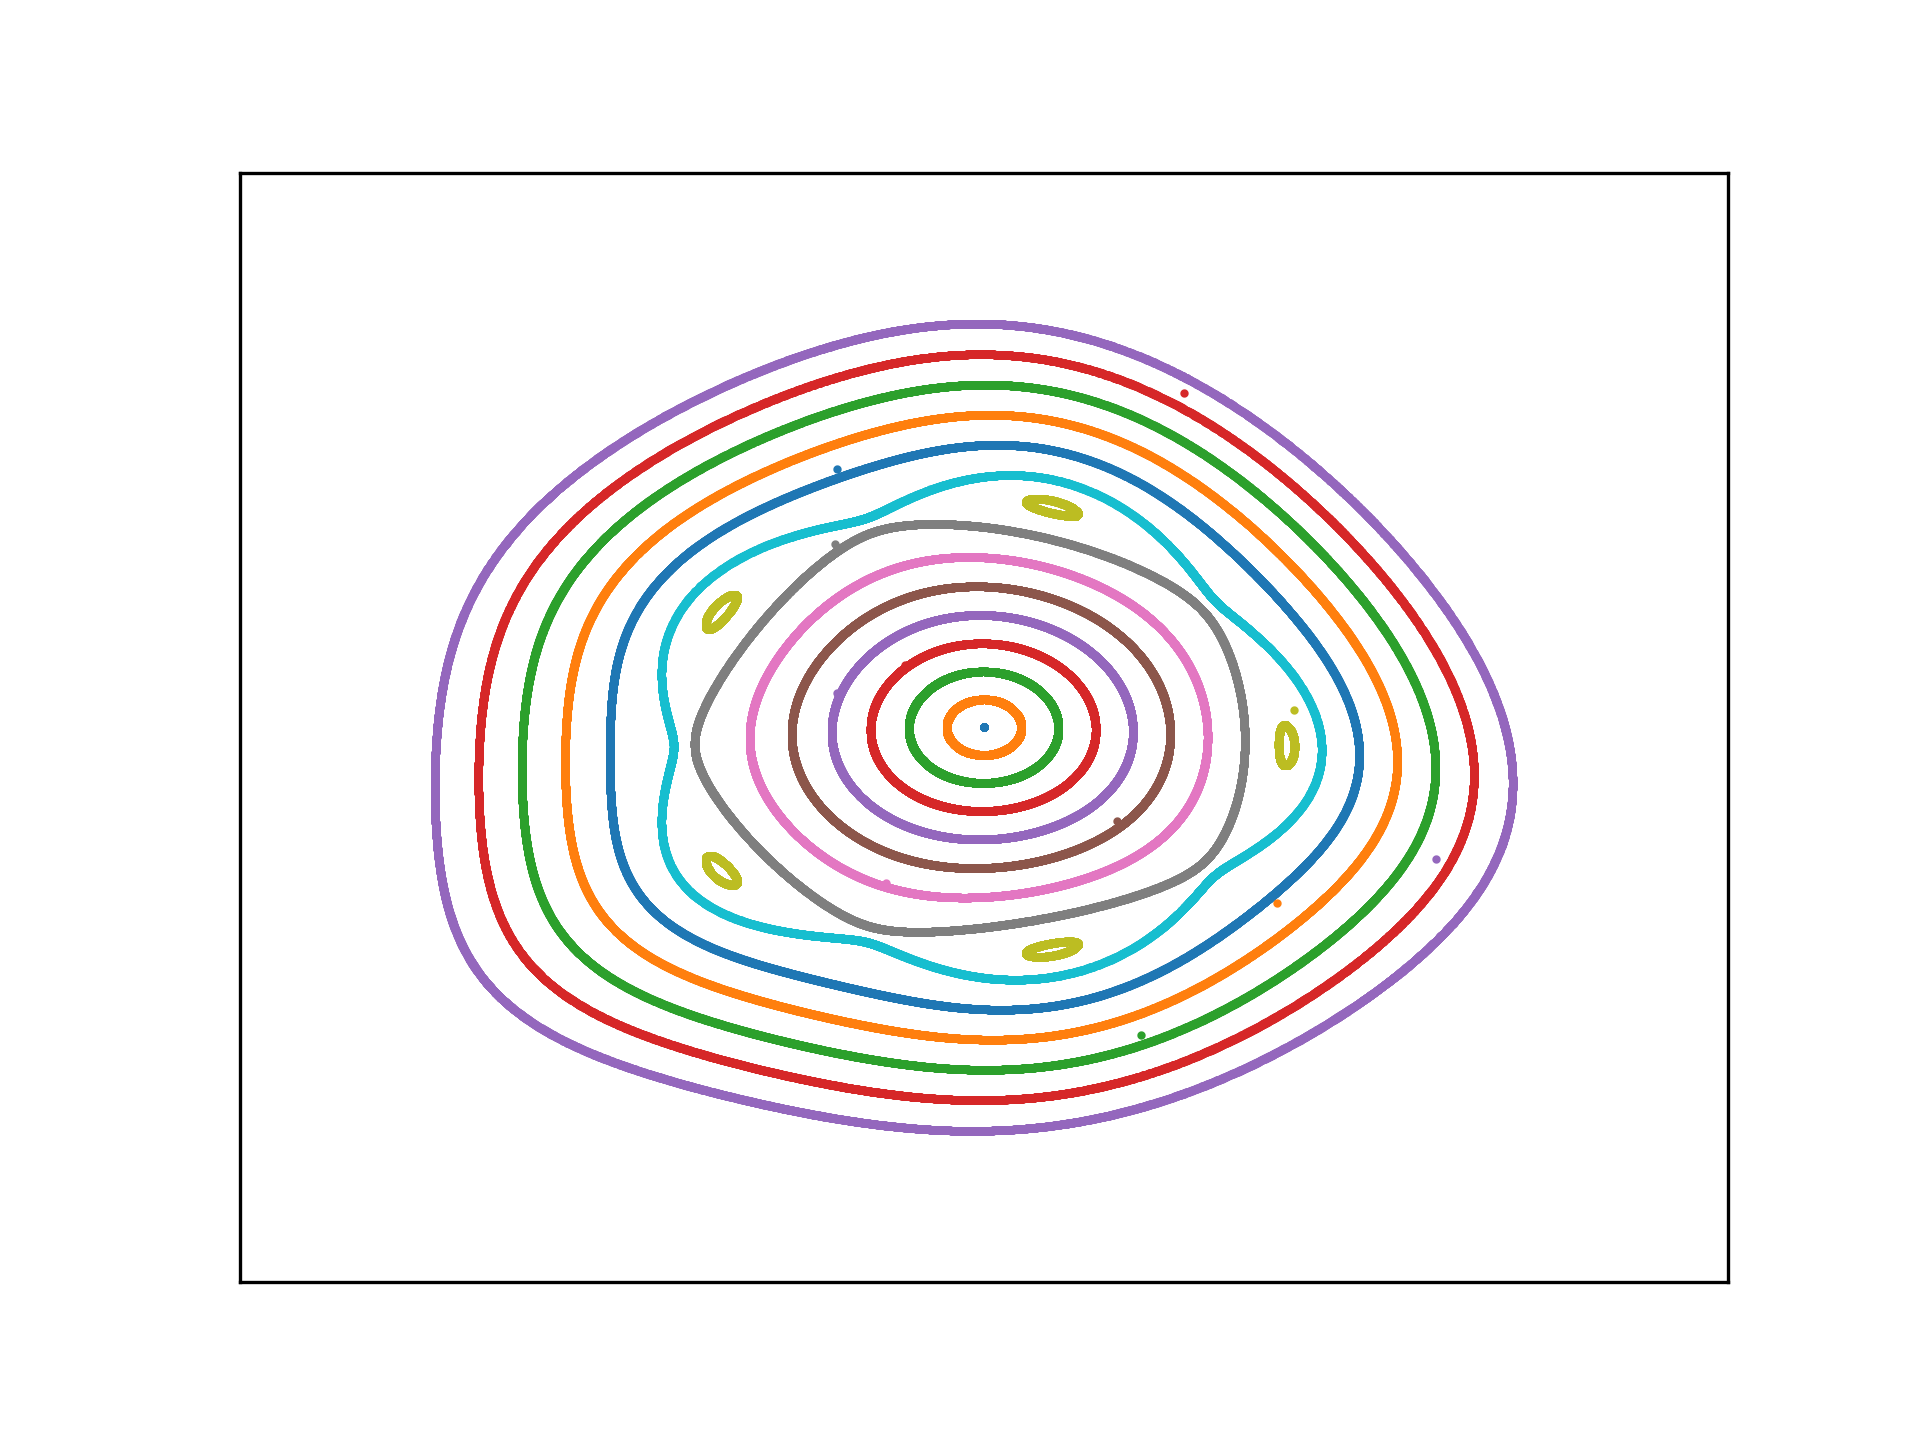

In [24]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib notebook

resonance=1.0/5.0
dvx=0.0010
dvy=0.0010
#resonance=1.0/4.0
#dvx=0.0001
#dvy=0.0001

#resonance=1.0/5.0
#dvx=0.0001
#dvy=-0.0001


pxs=np.concatenate([0.0001*np.arange(15), np.array([])])
#pxs=0.002*np.arange(10)
pxps=np.zeros_like(pxs)
#pxs=0.005*np.cos(np.linspace(0,np.pi, 10))
#pxps=0.005*np.sin(np.linspace(0,np.pi, 10))

particles=np.vstack([pxs,pxps])
xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvx, chrom=0.0, espr=0.0,
                  particles=particles)

pys=0.000*np.zeros_like(pxs)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvy, chrom=0.0, espr=0.0,
          particles=particles, 
          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=10000


def evolve_func(turns, kick_turn_start=0, B2=-400.0,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]+=B2*(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0
            ypy.coor2D[1,:]-=B2*ypy.coor2D[0,:]*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        #avex,avep,sizex,sizep,emit=xpx.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        #emitlist.append(emit)
        yield xpx.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.002,0.002])
ax.set_ylim([-0.002,0.002])
xlist=[]
xplist=[]


for i in range(N_turn):
    arr=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arr[0])
    xplist.append(arr[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
ax.plot(xarr,xparr,linestyle='None', marker='.', markersize=2)
ax.set_xticks([])
ax.set_yticks([])
Jx=xarr*xarr+xparr*xparr
fig.savefig("test.png",dpi=300,transparent=True)

<IPython.core.display.Javascript object>


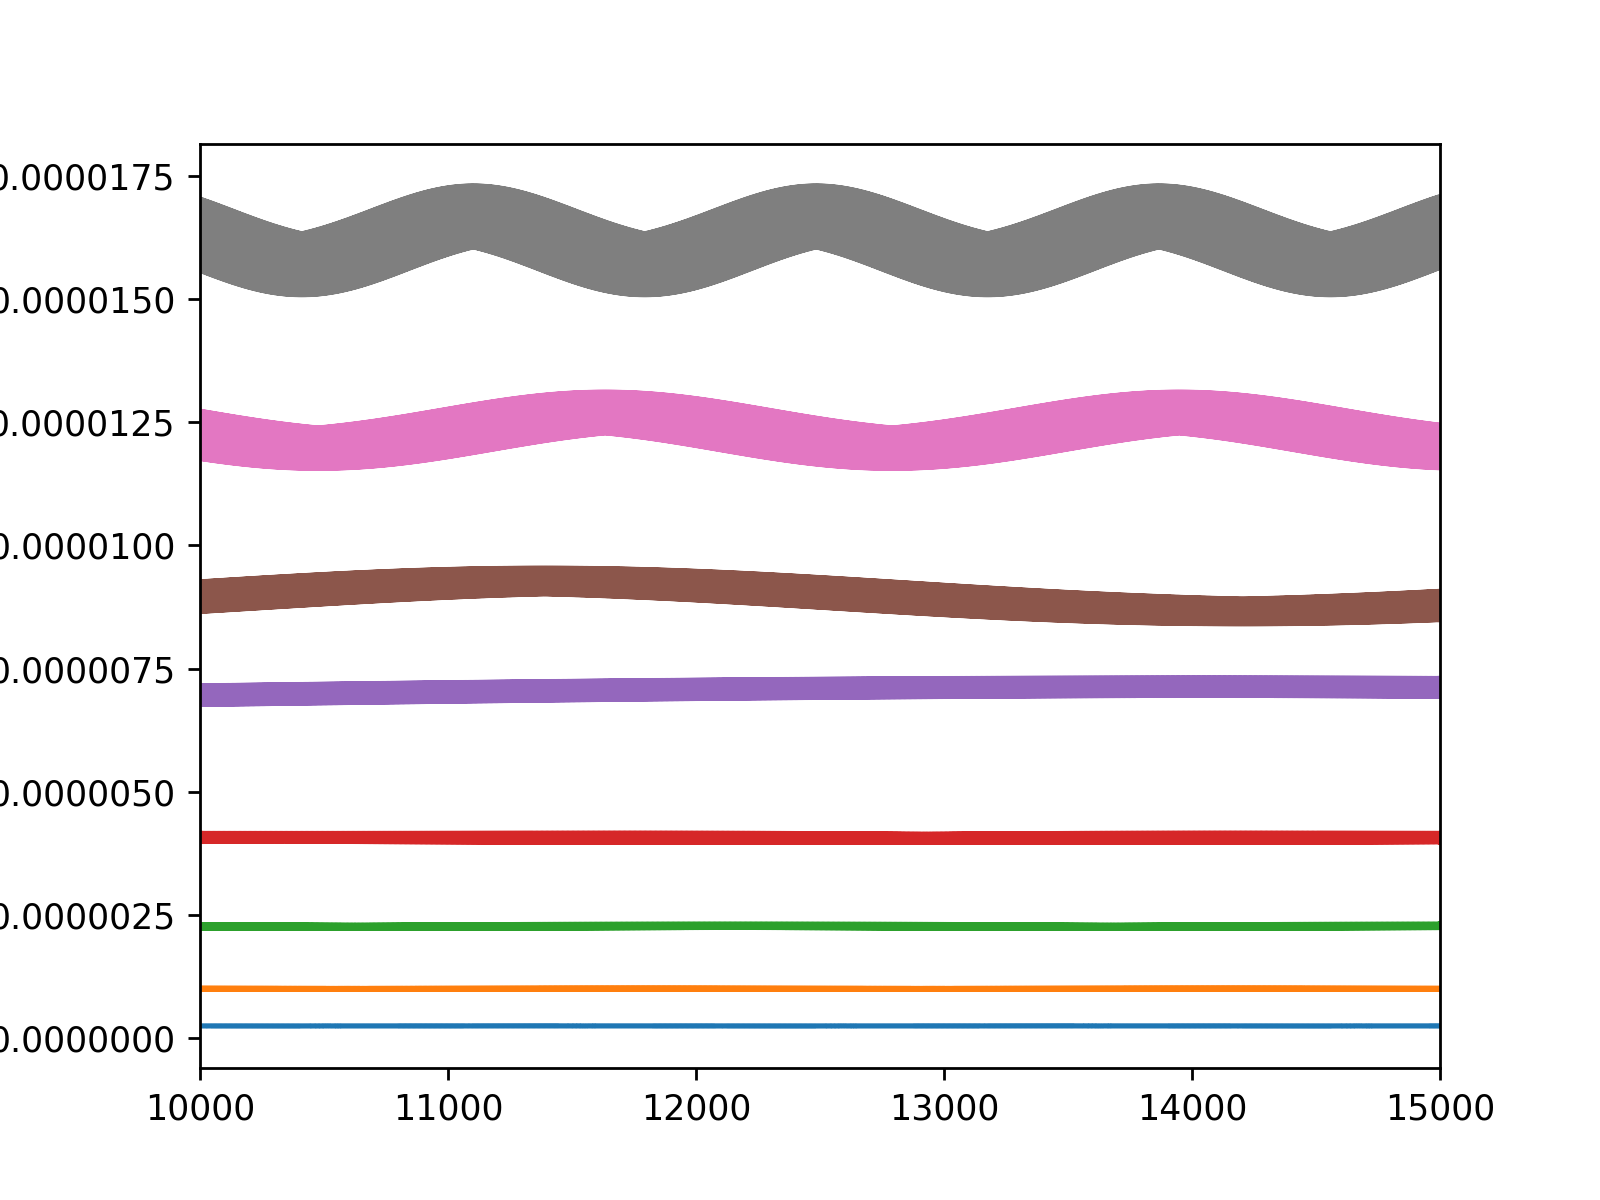

In [65]:
fig,ax=plt.subplots()
ax.set_xlim([10000,15000])
for i in range(8):
    ax.plot(Jx[:,i+1])
